In [23]:
import pandas as pd

import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
import rasterio.plot

from rasterio.plot import show

from rasterstats import zonal_stats

In [24]:
bound = 'C:/Users/GIGABYTE/Desktop/Đánh giá tiềm năng khu vực/VietNam/vietnam.geojson'
wind = 'C:/Users/GIGABYTE/Desktop/Đánh giá tiềm năng khu vực/VietNam/VNM_wind-speed_100m.tif'
catchments = gpd.read_file(bound)
demdata = rasterio.open(wind)

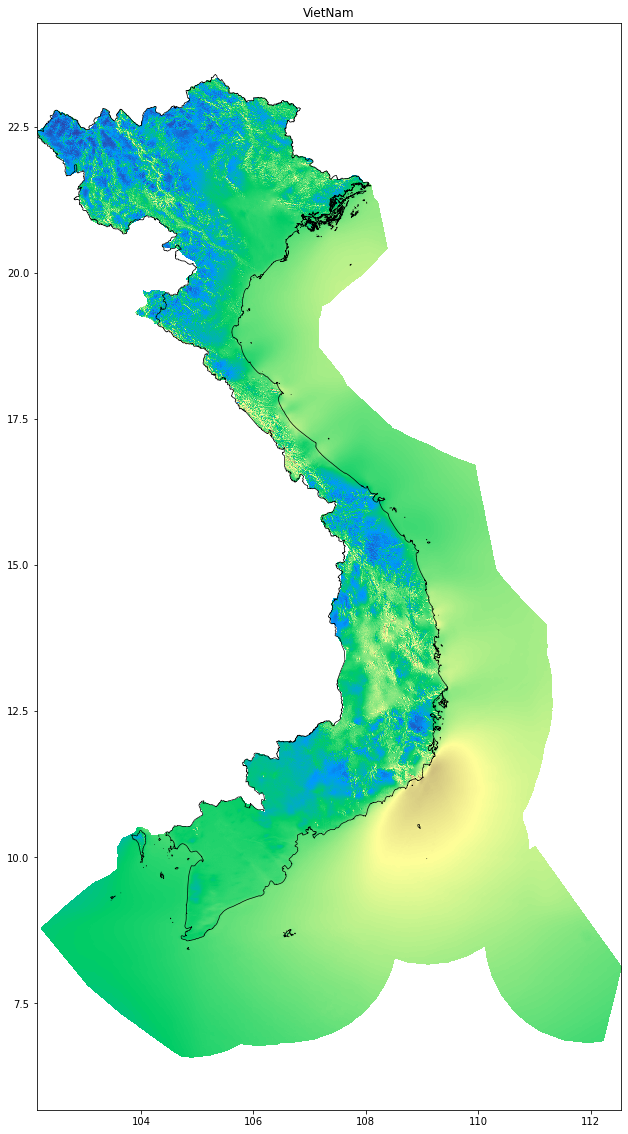

<Figure size 432x288 with 0 Axes>

In [25]:
fig, ax = plt.subplots(1, figsize=(20, 20))

show((demdata, 1), cmap='terrain', interpolation='none', ax=ax)

catchments.plot(ax=ax, facecolor="none", edgecolor='black', lw=0.7)

plt.title("VietNam")

plt.show()

plt.tight_layout()

In [26]:
zs = zonal_stats(bound, wind, stats=['mean','std'])

demstats_df = pd.DataFrame(zs)

demstats_df.rename(columns={'mean':'dem_mean','std':'dem_std'}, inplace=True)

catchments = pd.concat([catchments, demstats_df], axis=1)


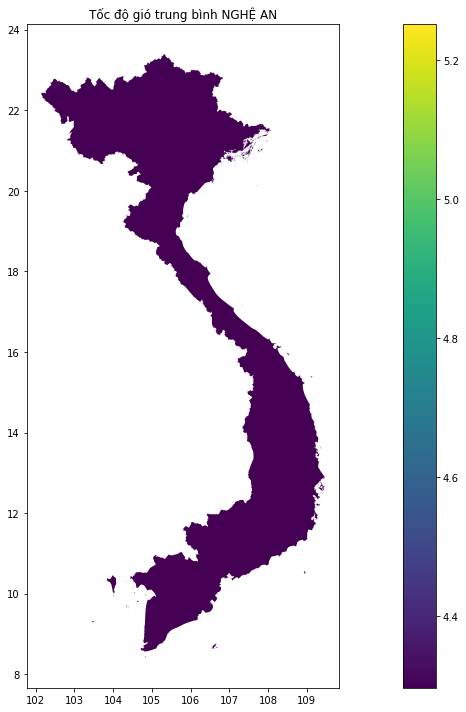

In [27]:
fig, ax = plt.subplots(1,  figsize=(18, 10))
plt.title("Tốc độ gió trung bình NGHỆ AN")
catchments.plot(column='dem_mean', ax=ax, legend=True)
plt.tight_layout()


In [152]:
def random_points_within(poly, num_points):
    min_x, min_y, max_x, max_y = poly.bounds

    points = []

    while len(points) < num_points:
        random_point = Point([random.uniform(min_x, max_x), random.uniform(min_y, max_y)])
        if (random_point.within(poly)):
            points.append(random_point)

    return points
points = random_points_within(catchments.geometry[0],100000)

In [116]:
import random
from shapely.geometry import Point

def generate_random(number, polygon):
    points = []
    minx, miny, maxx, maxy = polygon.bounds
    while len(points) < number:
        pnt = Point(random.uniform(minx, maxx), random.uniform(miny, maxy))
        if polygon.contains(pnt):
            points.append(pnt)
    return points

points = generate_random(20000, catchments.geometry[0])

In [153]:
import numpy as np
from shapely.geometry import Polygon, Point
import random
from geovoronoi import voronoi_regions_from_coords, points_to_coords


region_polys, region_pts  = voronoi_regions_from_coords(points, catchments.geometry[0])
#poly_shapes, pts, poly_to_pt_assignments = voronoi_regions_from_coords(coords, boundary_shape)

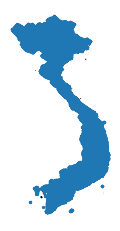

In [154]:
import matplotlib.pyplot as plt
from geovoronoi.plotting import subplot_for_map, plot_voronoi_polys_with_points_in_area

fig, ax = subplot_for_map()
plot_voronoi_polys_with_points_in_area(ax, catchments.geometry[0], region_polys, points)
plt.show()

In [155]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import shapely.geometry
import shapely.ops

In [156]:
vonorol = pd.DataFrame()
vonorol['geometry'] = region_polys.values()

C:\Users\GIGABYTE\anaconda3\envs\esm-tutorials\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


In [157]:
vonorol = vonorol.set_geometry('geometry')

In [158]:
vonorol.loc[:,'name'] = vonorol.index

In [159]:
zs = zonal_stats(vonorol.geometry, wind, stats=['mean','std'])

In [160]:
demstats_df = pd.DataFrame(zs)

demstats_df.rename(columns={'mean':'dem_mean','std':'dem_std'}, inplace=True)

In [161]:
vonorol = pd.concat([vonorol, demstats_df], axis=1)

In [162]:
vonorol.columns

Index(['geometry', 'name', 'dem_mean', 'dem_std'], dtype='object')

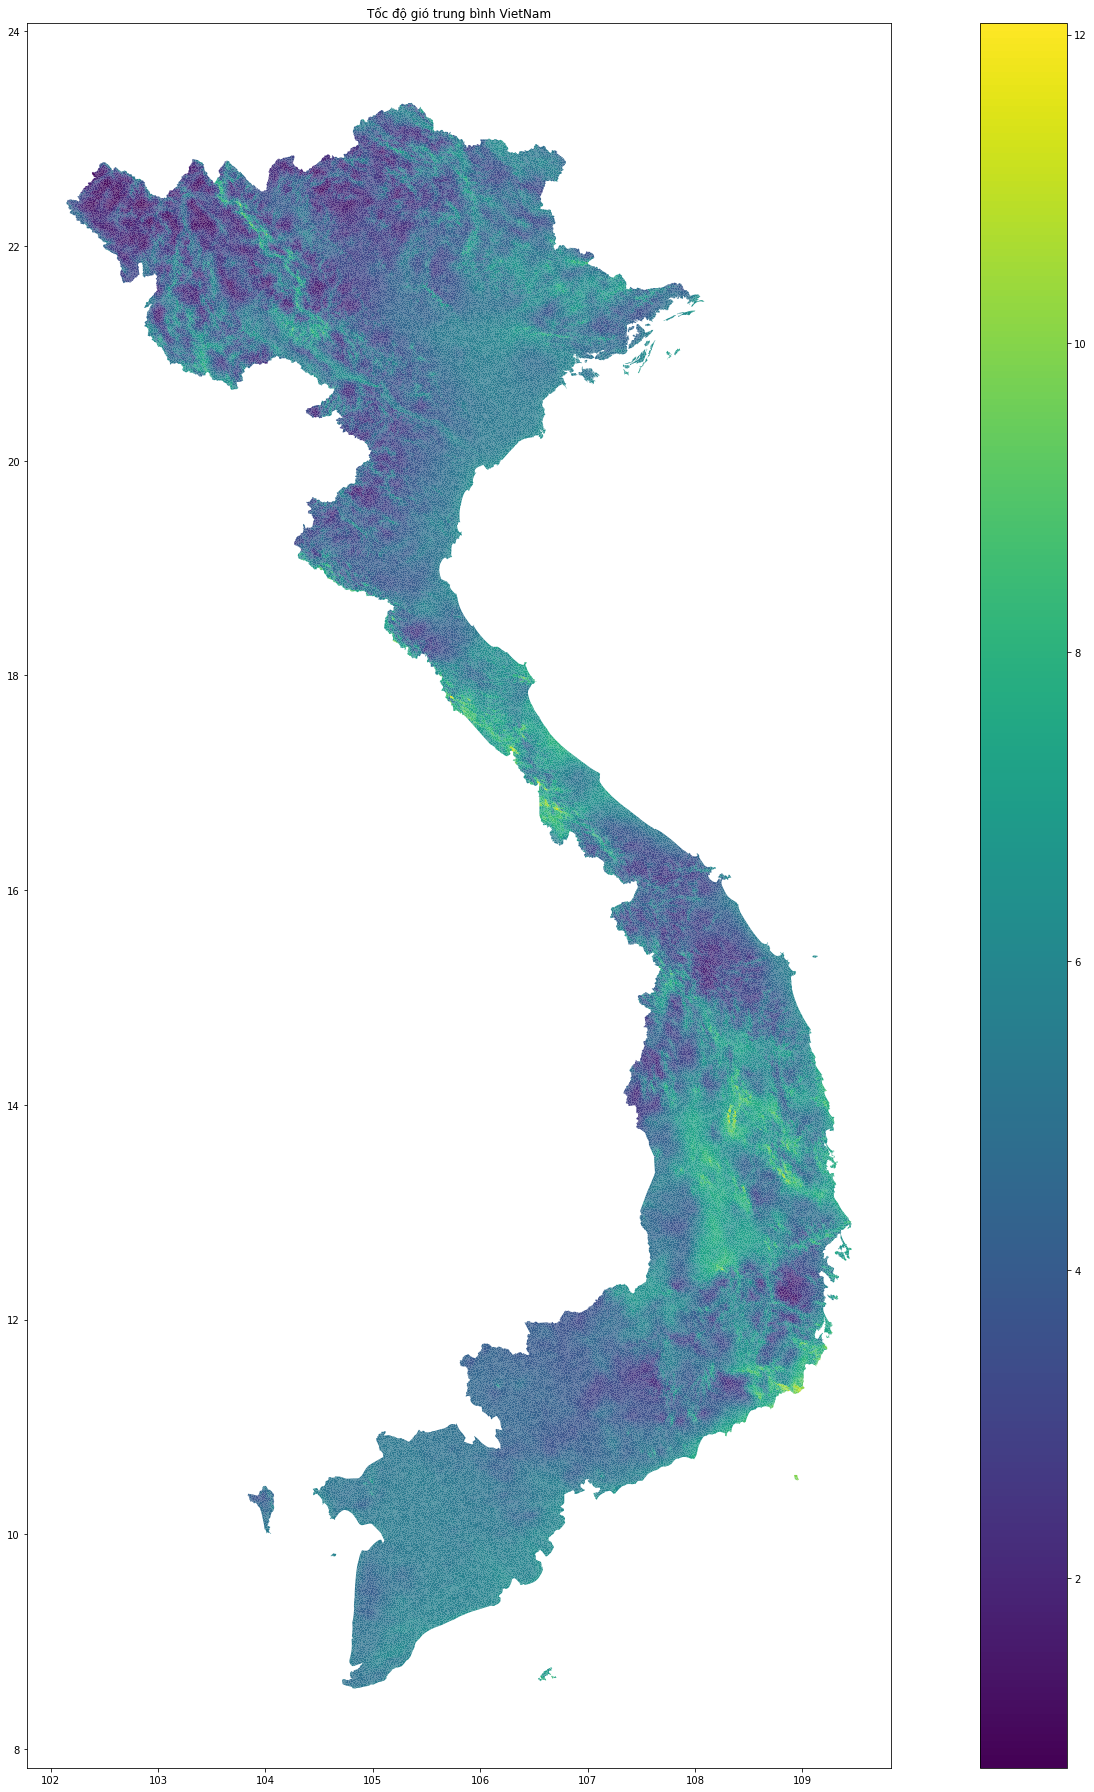

In [163]:
fig, ax = plt.subplots(1,  figsize=(25, 25))

plt.title("Tốc độ gió trung bình VietNam")

vonorol.plot(column='dem_mean', ax=ax, legend=True)

plt.tight_layout()

fig.savefig('C:/Users/GIGABYTE/Desktop/Đánh giá tiềm năng khu vực/Ranh gioi/VN_100000_6ms.png')

<AxesSubplot:title={'center':'Tốc độ gió trung bình lớn hơn 6'}>

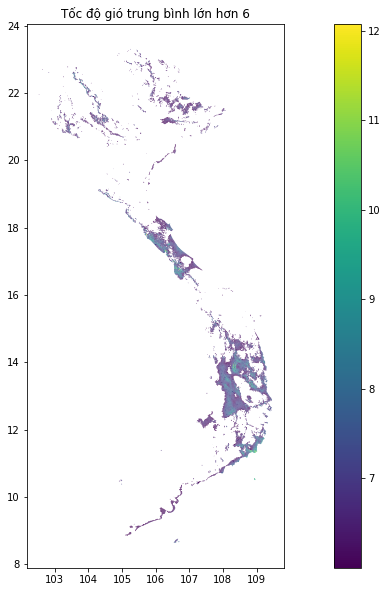

In [164]:
fig, ax = plt.subplots(1,  figsize=(18, 10))

plt.title("Tốc độ gió trung bình lớn hơn 6")

vonorol[vonorol.dem_mean > 6].plot(column='dem_mean', ax=ax, legend=True)



In [165]:
from geovoronoi import calculate_polygon_areas 

calculate_polygon_areas(region_polys)

{0: 0.00021894428491874614,
 1: 0.00038438040940999086,
 2: 0.0002827450724591764,
 3: 0.0002337006607519205,
 4: 0.00015356251304859898,
 5: 0.0001366101366747314,
 6: 9.249844697375797e-05,
 7: 0.00010548914266745216,
 8: 0.00020597733591766896,
 9: 0.00010020472253865939,
 10: 0.00014281690581020227,
 11: 0.00014047595027566985,
 12: 0.00022496742379198958,
 13: 0.00021839018039472718,
 14: 0.00017014478930720909,
 15: 0.00013259820088858202,
 16: 0.00034165585497147123,
 17: 0.0006743192231384112,
 18: 0.0006685585274383291,
 19: 0.00041802780181609905,
 20: 0.00020128776296734108,
 21: 0.00026777292552467263,
 22: 0.000529115119815603,
 23: 0.00014460068287289784,
 24: 0.0002329597649922354,
 25: 0.000383667870104431,
 26: 0.00011231948348222976,
 27: 0.0005797811513631434,
 28: 0.0007007509441518502,
 29: 0.00021522058967454093,
 30: 0.00022759798395019748,
 31: 0.000283010071115698,
 32: 0.00044350890723410285,
 33: 0.000376742738467829,
 34: 0.00023988326171050215,
 35: 7.17690

In [113]:
vonorol[vonorol.dem_mean > 7]['geometry'].to_csv('C:/Users/GIGABYTE/Desktop/Đánh giá tiềm năng khu vực/Ranh gioi/VietNam_2000_6ms.csv', header = False, index = False)

In [366]:
catchments

,Name,description,Quan,geometry,dem_mean,dem_std
0,Phường Hà Huy Tập,None,Thành phố Vinh,"POLYGON ((105.69182 18.69590, 105.69449 18.692...",5.037637,0.081965
1,Phường Đội Cung,None,Thành phố Vinh,"POLYGON ((105.67026 18.67878, 105.67025 18.676...",4.886718,0.023668
2,Phường Lê Lợi,None,Thành phố Vinh,"POLYGON ((105.67291 18.68855, 105.67291 18.688...",4.934991,0.048886
3,Phường Quán Bàu,None,Thành phố Vinh,"POLYGON ((105.66823 18.70909, 105.67068 18.703...",5.118348,0.082482
4,Phường Hưng Bình,None,Thành phố Vinh,"POLYGON ((105.68714 18.67815, 105.68683 18.677...",4.856700,0.048049
...,...,...,...,...,...,...
473,Xã Hưng Long,None,Huyện Hưng Nguyên,"POLYGON ((105.60447 18.63398, 105.60461 18.632...",5.235807,0.032307
474,Xã Hưng Tiến,None,Huyện Hưng Nguyên,"POLYGON ((105.63302 18.62871, 105.63128 18.626...",4.961513,0.064812
475,Xã Hưng Trung,None,Huyện Hưng Nguyên,"POLYGON ((105.61315 18.79689, 105.61297 18.795...",5.170048,0.049768
476,Xã Hưng Tân,None,Huyện Hưng Nguyên,"POLYGON ((105.63428 18.65244, 105.63444 18.651...",5.073878,0.032484


In [1]:
import geopandas as gpd
import fiona

fiona.supported_drivers['KML'] = 'rw'

gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.to_file('test.kml', driver='KML')

In [168]:
vonorol[vonorol.dem_mean > 6].to_file('C:/Users/GIGABYTE/Desktop/Đánh giá tiềm năng khu vực/Ranh gioi/Vietnam_100000_6ms.kml', driver='KML')

In [167]:
vonorol.to_file('C:/Users/GIGABYTE/Desktop/Đánh giá tiềm năng khu vực/Ranh gioi/Vietnam_100000.kml', driver='KML')

In [151]:
#Lưu file ảnh
#Lưu Ranh tổng
#Lưu Ranh >6m/s

In [20]:
import geopandas as gpd
import fiona

fiona.supported_drivers['KML'] = 'rw'

gdf = gpd.read_file('C:/Users/GIGABYTE/Desktop/Đánh giá tiềm năng khu vực/Ranh gioi/Vietnam_100000_6ms.kml')

C:\Users\GIGABYTE\anaconda3\envs\esm-tutorials\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


In [21]:
gdf

,Name,Description,geometry
0,0,,"POLYGON ((109.44756 12.88640, 109.45314 12.879..."
1,1,,"POLYGON ((109.43023 12.91783, 109.44258 12.919..."
2,2,,"POLYGON ((109.44756 12.88640, 109.43032 12.886..."
3,3,,"POLYGON ((109.42716 12.90601, 109.42174 12.905..."
4,4,,"POLYGON ((109.41814 12.90945, 109.42174 12.905..."
...,...,...,...
14915,99856,,"POLYGON ((107.58624 21.19364, 107.58660 21.209..."
14916,99917,,"MULTIPOLYGON (((106.60366 20.29222, 106.60475 ..."
14917,99918,,"POLYGON ((106.59126 20.25456, 106.59140 20.254..."
14918,99919,,"POLYGON ((106.58895 20.27509, 106.58176 20.281..."


<AxesSubplot:>

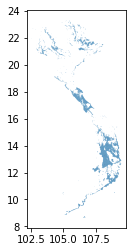

In [27]:
gdf.plot()